In [1]:
import pandas as pd
import numpy as np
from scipy import stats

## **Loading and Visualization Data**

In [2]:
train = pd.read_csv('train.csv')
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
test = pd.read_csv('test.csv')
test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


## **Data Munging**

In [4]:
# removendo a colunas ID
train.drop(['ID'], axis=1, inplace=True)
id_submission = list(test['ID'])
test.drop(['ID'], axis=1, inplace=True)

In [5]:
# removendo constant columns (no train)
colRemove = []
for col in train.columns:
    if train[col].std() == 0:
        colRemove.append(col)
train.drop(colRemove, axis=1, inplace=True)

In [6]:
# removendo as mesma colunas só que no test
test.drop(colRemove, axis=1, inplace=True)

In [7]:
# removendo duplicate columns
colRemove = []
columns = train.columns
for i in range(len(columns)-1):
    v = train[columns[i]].values
    for j in range(i+1,len(columns)):
        if np.array_equal(v,train[columns[j]].values):
            colRemove.append(columns[j])
train.drop(colRemove, axis=1, inplace=True)

In [8]:
# removendo as mesma colunas só que no test
test.drop(colRemove, axis=1, inplace=True)

In [9]:
# Como há muitos exemplos com muitas variáveis iguais a 0
# Irei criar uma nova coluna n0 contando a quantidade de valores igual a 0.
X = train.iloc[:,:-1]
X['n0'] = (X==0).sum(axis=1)
train['n0'] = X['n0']
train.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET,n0
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0,292
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0,266
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0,277
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0,248
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0,256


In [10]:
# Como há muitos exemplos com muitas variáveis iguais a 0
# Irei criar uma nova coluna n0 contando a quantidade de valores igual a 0.
Y = test.iloc[:,:-1]
Y['n0'] = (Y==0).sum(axis=1)
test['n0'] = Y['n0']
test.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,n0
0,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10,275
1,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72,278
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95,259
3,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61,292
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73,277


In [11]:
# removendo os outliers utilizando o IQR
def outliers_IQR(data, col):
    lower_quartile = data[col].quantile(0.25)
    upper_quartile = data[col].quantile(0.75)
    IQR = upper_quartile - lower_quartile
    outlier_thresh = 1.5 * IQR
    return data[data[col].between((lower_quartile - outlier_thresh), (upper_quartile + outlier_thresh))]

train = outliers_IQR(train,'var15')

In [12]:
# removendo os outliers utilizando o z score
train = train[np.abs(stats.zscore(train['var15'])) <= 3]

In [13]:
# novo shape do data set
train.shape

(73185, 308)

## **Data Exploration**

In [14]:
# algumas libs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73185 entries, 0 to 76019
Columns: 308 entries, var3 to n0
dtypes: float64(110), int64(198)
memory usage: 172.5 MB


In [16]:
train.describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET,n0
count,73185.000000,73185.000000,73185.000000,73185.000000,73185.000000,73185.000000,73185.000000,73185.000000,73185.000000,73185.000000,...,73185.000000,73185.000000,73185.000000,73185.000000,73185.000000,73185.000000,73185.000000,7.318500e+04,73185.000000,73185.000000
mean,-1555.097616,31.656924,81.681297,73.723331,121.630596,3.410564,6.060795,0.422794,0.583181,2.980792,...,1.360449,10.015087,7.371731,24.055535,1.428217,62.923544,47.073664,1.166061e+05,0.039393,272.879962
std,39437.243010,10.337068,1505.648771,342.615771,551.059930,91.229308,147.175210,31.147605,37.176751,92.293420,...,115.525624,586.977236,417.426097,1892.496563,131.430096,3866.332243,2744.080510,1.805084e+05,0.194530,17.310844
min,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000,164.000000
25%,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.758193e+04,0.000000,263.000000
50%,2.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.058277e+05,0.000000,277.000000
75%,2.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.180427e+05,0.000000,287.000000
max,238.000000,63.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,8237.820000,...,20385.720000,63317.190000,42767.160000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000,298.000000


São muitas features (mais de 350), com pouca informação sobre o que cada uma representa e o nome das mesmas não ajuda. Então, pesquisei em alguns notebooks do Kaggle e achei o significado de algumas dessas features. Abaixo, trago uma breve análise de algumas.

### var3: nationality of the customer

In [17]:
train['var3'].value_counts()[:15]

 2         71488
 8           134
-999999      114
 9           108
 3            97
 13           95
 1            93
 7            91
 4            82
 6            81
 12           79
 0            70
 10           67
 11           65
 5            62
Name: var3, dtype: int64

Os valores -999999 representa quem não sabe de onde é, que representa menos do que 1% dos dados, por isso irei substituir seus valores pelo mais comum (2) que representa mais de 97%.

In [18]:
size = train[train['var3']==-999999].var3.count()
sizeT= train['var3'].count()
print(f'{np.round(size/sizeT*100,2)}% dos dados são -999999')

0.16% dos dados são -999999


In [19]:
size = train[train['var3']==2].var3.count()
sizeT = train['var3'].count()
print(f'{np.round(size/sizeT*100,2)}% dos dados são 2')

97.68% dos dados são 2


In [20]:
train['var3'][train['var3']==-999999] = 2
train['var3'].value_counts()[:15]

2     71602
8       134
9       108
3        97
13       95
1        93
7        91
4        82
6        81
12       79
0        70
10       67
11       65
5        62
14       59
Name: var3, dtype: int64

### num_var4 : number of bank products

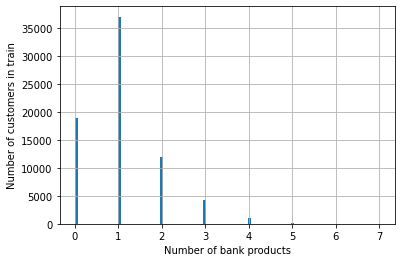

In [21]:
# Vamos plotar a distribuição de produtos
# Concluímos que a maioria dos clientes possui 1 produto no banco
train.num_var4.hist(bins=100)
plt.xlabel('Number of bank products')
plt.ylabel('Number of customers in train')
plt.show()

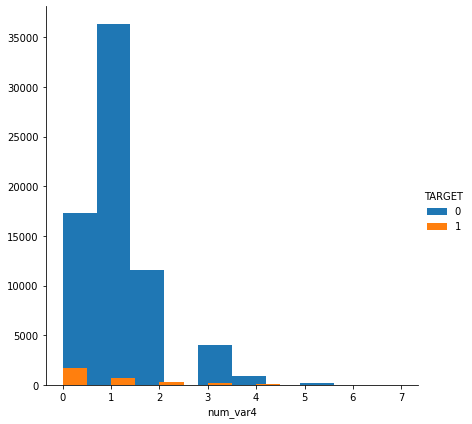

In [22]:
# Vamos ver a densidade da idade dos cliente felizes e infelizes
# Percebemos que cliente infelizes tem menos produto
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(plt.hist, "num_var4") \
   .add_legend()
plt.show()

### var15: age

Como a var15 representa a idade, logo ela deve ser muito importante, por isso vamos olhar para ela um pouco mais de perto.

In [23]:
# breve descrição
train['var15'].describe()

count    73185.000000
mean        31.656924
std         10.337068
min          5.000000
25%         23.000000
50%         27.000000
75%         38.000000
max         63.000000
Name: var15, dtype: float64

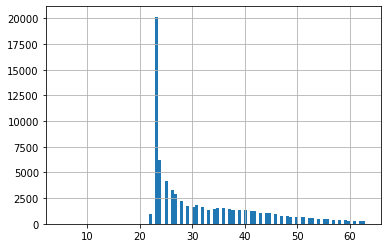

In [24]:
# ver sua distribuição
train['var15'].hist(bins=100);

### Balanceando o data set
Data set bem desbalanceado. Utilizarei a técnica de Random Over Sampler para balancear.

In [25]:
# consumidores felizes tem TARGET==0, consumidores infelizes tem TARGET==1
df_cust = pd.DataFrame(train.TARGET.value_counts())
df_cust['Percentage'] = 100*df_cust['TARGET']/train.shape[0]
df_cust

,TARGET,Percentage
0,70302,96.060668
1,2883,3.939332


In [26]:
# dividindo os dados
X = train.drop(['TARGET'], axis=1)
y = train[['TARGET']]

In [27]:
# libs
from imblearn.over_sampling import RandomOverSampler

In [28]:
# balanceando
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X,y)

In [29]:
# recriar o data set balanceado
train = pd.concat([X_ros, y_ros], axis=1)

In [30]:
# consumidores felizes tem TARGET==0, consumidores infelizes tem TARGET==1
df_cust = pd.DataFrame(train.TARGET.value_counts())
df_cust['Percentage'] = 100*df_cust['TARGET']/train.shape[0]
df_cust

,TARGET,Percentage
1,70302,50.0
0,70302,50.0


## **Feature Selection**

### Correlation

In [32]:
# criacao de dataframe de correlacao entre as features e a variavel objetivo
feature_corr = pd.DataFrame(train.corr()['TARGET'])
feature_corr.head()

,TARGET
var3,-0.029259
var15,0.321585
imp_ent_var16_ult1,0.000222
imp_op_var39_comer_ult1,0.026368
imp_op_var39_comer_ult3,0.011738


In [33]:
# criando a coluna de correlação absoluta e ordenando por ela
feature_corr['corr_abs'] = feature_corr['TARGET'].apply(lambda x: x if x>0 else abs(x))
feature_corr.columns = ['corr','corr_abs']
feature_corr.sort_values(by='corr_abs',ascending=False,inplace=True)
feature_corr.head()

,corr,corr_abs
TARGET,1.000000,1.000000
num_meses_var5_ult3,-0.358083,0.358083
ind_var30,-0.341230,0.341230
num_var30,-0.337260,0.337260
ind_var5,-0.332586,0.332586


In [34]:
# há muitos valores menores do que 0.1, logo vamos tirá-lo
feature_corr = feature_corr[feature_corr['corr_abs'] > 0.1]
feature_corr.head()

,corr,corr_abs
TARGET,1.000000,1.000000
num_meses_var5_ult3,-0.358083,0.358083
ind_var30,-0.341230,0.341230
num_var30,-0.337260,0.337260
ind_var5,-0.332586,0.332586


In [35]:
train = train[feature_corr.index]
train.head()

,TARGET,num_meses_var5_ult3,ind_var30,num_var30,ind_var5,num_var5,num_var42,var15,var36,num_var4,...,num_var13_0,saldo_var30,ind_var12_0,num_meses_var13_corto_ult3,ind_var13_corto,num_var13_corto,ind_var13_corto_0,num_var13_corto_0,ind_var12,num_var12
0,0,0,0,0,0,0,0,23,99,0,...,0,0.00,0,0,0,0,0,0,0,0
1,0,1,1,3,0,0,0,34,3,1,...,3,300.00,0,3,1,3,1,3,0,0
2,0,3,1,3,1,3,3,23,99,1,...,0,3.00,0,0,0,0,0,0,0,0
3,0,2,1,3,1,3,3,37,2,3,...,0,70.62,0,0,0,0,0,0,0,0
4,0,3,1,3,0,0,3,39,1,1,...,0,135003.00,1,0,0,0,0,0,1,3


In [36]:
test = test[feature_corr.index[1:]]
test.head()

,num_meses_var5_ult3,ind_var30,num_var30,ind_var5,num_var5,num_var42,var15,var36,num_var4,num_var35,...,num_var13_0,saldo_var30,ind_var12_0,num_meses_var13_corto_ult3,ind_var13_corto,num_var13_corto,ind_var13_corto_0,num_var13_corto_0,ind_var12,num_var12
0,3,1,3,1,3,3,32,3,1,3,...,0,6.0,0,0,0,0,0,0,0,0
1,3,1,3,1,3,3,35,3,1,3,...,0,3.0,0,0,0,0,0,0,0,0
2,3,1,3,1,3,3,23,3,2,6,...,0,30.0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,24,99,0,0,...,0,0.0,0,0,0,0,0,0,0,0
4,3,1,3,1,3,3,23,3,1,3,...,0,30.0,0,0,0,0,0,0,0,0


## **Machine Learning**

In [37]:
# imports (importa todos os algoritmos)
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [38]:
# retornar a confusion matrix, accuracy, precision, sensibility
def metricas(y_val, y_pred):
    from sklearn.metrics import confusion_matrix

    conf = confusion_matrix(y_val, y_pred)
    tn, fp, fn, tp = conf.ravel()
    sens = tp / tp+fn
    acc = (tp+tn) / (tn+fp+fn+tp)
    prec = tp / (tp+fp)
    
    return {'Confusion Matrix': conf, 'Sensibility': sens, 
            'Accuracy': acc, 'Precision': prec}
    
# roda os modelos
def class_methods(method, model, data, params=None):
    from sklearn.model_selection import  GridSearchCV
    from sklearn.model_selection import train_test_split

    X = data.drop('TARGET', axis=1)
    y = data[['TARGET']]
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
        
    if params is not None:
        new_model = GridSearchCV(estimator=model, param_grid=params,
                                 scoring='neg_mean_squared_error')
        new_model.fit(X_train, y_train)
        model = new_model.best_estimator_
    else:
        model.fit(X_train, y_train)
       
    p = model.predict(X_val)
    param = model.get_params()
    results = metricas(y_val, p)    
    
    results['Parametros'] = param
    results['Modelos'] = model
    results['Previsao'] = p
    results['Metodo'] = method
        
    return results

def print_results(results):
    
    print(f"Metodo: {results['Metodo']}")
    print(f"Parametros: {results['Parametros']}")
    print(f"Confusion Matrix:\n{results['Confusion Matrix']}")
    print(f"Accuracy: {results['Accuracy']}")
    print(f"Sensibility: {results['Sensibility']}")
    print(f"Precision: {results['Precision']}")
    print("-------------------------------------------------------------------------------------------")

In [39]:
# alguns inputs com informações importantes
outliers = 'None' # None, ZScore, IQR, ZScore&IQR
obs = ''
overall_results = pd.read_excel('result.xlsx')
#overall_results = pd.DataFrame()

methods = ['logistica_reg', 'naiveBayes', 'randomForest', 'xgb']#, 'svc']

for method in methods:

    if method == 'logistica_reg':
        model = LogisticRegression()
        params = {'penalty': ('l1','l2'), 'C': [1.0,10]}
  
    elif method =='naiveBayes':
        model = GaussianNB()
        params = {}

    elif method == 'randomForest':
        model = RandomForestClassifier()
        params = {'n_estimators': [100,150], 'criterion': ('gini','entropy'),
                  'max_features': ('auto','sqrt','log2')}
        
    elif method == 'svc':
        model = SVC()
        params = {}
            
    elif method == 'xgb':        
        model = XGBClassifier()
        params = {'learning_rate': [0.0, 1.0], 'booster': ('gbtree','gblinear','dart')}
    params = None
    results = class_methods(method,model,train,params)
    
    print_results(results)
    
    results['Outliers'] = outliers
    results['Obs'] = obs
    
    result = pd.DataFrame(results, index=['Metodo'], 
                          columns=['Metodo','Accuracy','Sensibility',
                                   'Precision','Outliers','Obs'])
    
    overall_results = pd.concat([overall_results,result])

overall_results.to_excel('result.xlsx',index=False)

Metodo: logistica_reg
Parametros: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Confusion Matrix:
[[10420  3575]
 [ 4313  9813]]
Accuracy: 0.7194978841435227
Sensibility: 4314.0
Precision: 0.7329698237227368
-------------------------------------------------------------------------------------------
Metodo: naiveBayes
Parametros: {'priors': None, 'var_smoothing': 1e-09}
Confusion Matrix:
[[9564 4529]
 [4200 9828]]
Accuracy: 0.6895914085558835
Sensibility: 4201.0
Precision: 0.6845441248171623
-------------------------------------------------------------------------------------------
Metodo: randomForest
Parametros: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 

## Melhor modelo

Metodo: randomForest

Accuracy: 0.87

Precision: 0.86

Parametros: {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 100}

OBS: ao submeter no Kaggle, o desempenho caiu consideravelmente, provável que tenha ocorrido Overthinking.

### Segundo melhor modelo

Metodo: xgb

Accuracy: 0.83

Precision: 0.82

Parametros: {booster = 'gbtree', learning_rate = 0.300000012}

## **Submissão pro Kaggle**

Esta parte, irei usar o melhor modelo para prever o data set test.csv e submeter lá no Kaggle.

In [40]:
# separando o data set em treino e validação
from sklearn.model_selection import train_test_split
X = train.drop('TARGET', axis=1)
y = train[['TARGET']]
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.2, random_state=42)

In [41]:
# gerar/treina o modelo novamente
#model = RandomForestClassifier(criterion = 'gini', max_features = 'auto', n_estimators = 100)
model = XGBClassifier(booster = 'gbtree', learning_rate = 0.300000012)
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
# gerar o data ser para submissão
y_pred = list(model.predict(test))
sub_df = pd.DataFrame({'ID': id_submission,
                       'TARGET': y_pred,
                      })
sub_df.to_csv(r'\submission.csv', index = False, header=True)
sub_df.head()
# Kaggle: 0.68 -> RandomForestClassifier
# Kaggle: 0.73 -> XGBoosting

,ID,TARGET
0,2,0
1,5,1
2,6,0
3,7,0
4,9,0
